In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
t_login = pd.read_csv('../datas/t_login.csv')
t_login.head()

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,2.618369e+15,5.0,879361,10,1026491,194,1,1.428642e+09,1,116825,True,False,2015-04-10 12:54:19
1,9.969739e+14,16124.0,835072,1,1026491,194,1,1.428809e+09,1,109987,False,False,2015-04-12 11:20:45
2,8.123343e+15,5.0,879361,10,1026491,194,1,1.427705e+09,1,116825,True,False,2015-03-30 16:38:20
3,3.265677e+14,6.0,879361,10,1026491,194,1,1.428309e+09,1,116825,True,False,2015-04-06 16:22:18
4,6.684659e+15,4.0,879361,10,1026491,194,1,1.428221e+09,1,116825,True,False,2015-04-05 15:55:01


In [64]:
t_login['timestamp_online'] = t_login['timestamp'] + t_login['timelong']
t_login.head()

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time,timestamp_online
0,2.618369e+15,5.0,879361,10,1026491,194,1,1.428642e+09,1,116825,True,False,2015-04-10 12:54:19,1.428642e+09
1,9.969739e+14,16124.0,835072,1,1026491,194,1,1.428809e+09,1,109987,False,False,2015-04-12 11:20:45,1.428825e+09
2,8.123343e+15,5.0,879361,10,1026491,194,1,1.427705e+09,1,116825,True,False,2015-03-30 16:38:20,1.427705e+09
3,3.265677e+14,6.0,879361,10,1026491,194,1,1.428309e+09,1,116825,True,False,2015-04-06 16:22:18,1.428309e+09
4,6.684659e+15,4.0,879361,10,1026491,194,1,1.428221e+09,1,116825,True,False,2015-04-05 15:55:01,1.428221e+09


In [65]:
t_login.shape

(595645, 14)

In [66]:
data = t_login[t_login['result']==1]
data.shape

(460503, 14)

In [62]:
d = t_login[['result','ip']].groupby('result').count()
d.head()

,ip
result,
-4,857
-2,12428
-1,11541
1,460503
3,40


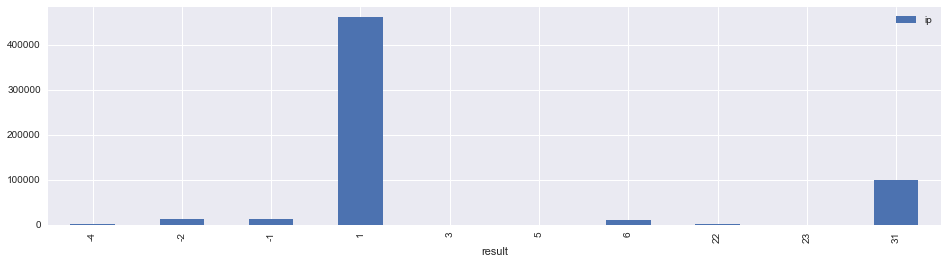

In [63]:
d.plot.bar(figsize=(16, 4))
plt.show()

In [55]:
t_login.loc[1]['timestamp']

1428808845.0

In [56]:
pd.to_datetime('2015-04-12 11:20:45').value//10**9

1428837645

In [112]:
pd.to_datetime('2015-04-12 11:20:15').value//10**9

1428837615

In [113]:
1428837645 - 1428837615

30

In [57]:
1428837645 - 1428808845.0

28800.0

In [71]:
id = 18138
time = '2015-01-01 03:02:01.0'
d = t_login[t_login['id']==id][t_login['time']<time]\
                .sort_values('time',ascending=False)\
                .reset_index()
d

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,index,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time,timestamp_online
0,398441,5.175043e+15,9000.0,835072,2,724987,418,1,1.420052e+09,3,18138,False,False,2015-01-01 02:59:24,1.420061e+09
1,501080,5.612790e+15,22900.0,38853,1,1209900,471,1,1.420051e+09,3,18138,False,False,2015-01-01 02:38:52,1.420074e+09
2,51617,8.379107e+15,3000.0,835072,2,489783,44,1,1.420048e+09,3,18138,False,False,2015-01-01 01:41:13,1.420051e+09


In [109]:
d['result'] = d['result'].map(lambda x: x==1 and 1 or -1)
dtt = d[d['result']==-1]['ip'].value_counts()
dtt

Series([], Name: ip, dtype: int64)

In [111]:
dict(dtt)

KeyError: '1'

In [101]:
dict(dtt.count())

{'ip': 3, 'result': 3}

In [72]:
d.loc[:3]['timelong']

0     9000.0
1    22900.0
2     3000.0
Name: timelong, dtype: float64

In [73]:
d.loc[:3]['timelong'].median()

9000.0

In [76]:
tmp = d.loc[:3]['is_scan'].value_counts()

In [91]:
False in dict(tmp)

True

In [37]:
d.loc[0]['timestamp']

1420052364.0

In [46]:
pd.to_datetime(1420052364.0)

Timestamp('1970-01-01 00:00:01.420052364')

In [45]:
pd.to_datetime('2015-01-01 02:59:24').value//10**9

1420081164

In [50]:
1420081164 - 1420052364.0

28800.0

In [42]:
pd.Timestamp('2015-01-01 02:59:24').value//10**9 + 9000.0

1420090164.0

In [24]:
d.loc[:3]['timelong'].std()

10208.003396028693

In [47]:
d.loc[1]['timestamp']

1420051132.0

In [48]:
pd.to_datetime('2015-01-01 02:38:52').value//10**9

1420079932

In [51]:
1420079932 - 1420051132.0

28800.0

In [49]:
pd.Timestamp('2015-01-01 02:59:24').value//10**9 + 22900.0

1420104064.0

In [52]:
d.loc[2]['timestamp']

1420047673.0

In [53]:
pd.to_datetime('2015-01-01 01:41:13').value//10**9

1420076473

In [54]:
1420076473 - 1420047673.0

28800.0

In [3]:
t_trade = pd.read_csv('../datas/t_trade.csv')
t_trade.head()

,rowkey,time,id,is_risk
0,3,2015-01-01 00:00:41.0,27863,0
1,6,2015-01-01 00:00:46.0,115201,0
2,13,2015-01-01 00:01:02.0,143711,0
3,32,2015-01-01 00:03:00.0,172699,0
4,43,2015-01-01 00:03:52.0,53265,0


In [4]:
t_login_test = pd.read_csv('../datas/t_login_test.csv')
t_login_test.head()

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,1.955082e+16,7000.0,419819,2,1536093,238,1,1.436157e+09,3,5887,False,False,2015-07-06 12:23:45
1,9.716474e+15,16363.0,298355,1,715488,238,1,1.437054e+09,3,10909,False,False,2015-07-16 21:44:41
2,7.371385e+15,22379.0,298355,1,715488,238,1,1.437015e+09,3,10909,False,False,2015-07-16 10:46:41
3,9.642499e+13,27733.0,298355,1,646560,238,1,1.436795e+09,3,10909,False,False,2015-07-13 21:38:23
4,3.714001e+16,6242.0,747880,1,238942,238,1,1.437444e+09,1,151823,False,False,2015-07-21 10:02:49


In [5]:
t_trade_test = pd.read_csv('../datas/t_trade_test.csv')
t_trade_test.head()

,rowkey,time,id
0,24,2015-07-01 00:04:41.0,98066
1,37,2015-07-01 00:12:45.0,151688
2,45,2015-07-01 00:15:12.0,86468
3,46,2015-07-01 00:15:24.0,86468
4,48,2015-07-01 00:15:58.0,82720


In [68]:
t_trade['trade_stamp'] = t_trade['time'].map(lambda x:pd.to_datetime(x).value//10**9 - 28800.0)
t_trade.head()

,rowkey,time,id,is_risk,trade_stamp
0,3,2015-01-01 00:00:41.0,27863,0,1.420042e+09
1,6,2015-01-01 00:00:46.0,115201,0,1.420042e+09
2,13,2015-01-01 00:01:02.0,143711,0,1.420042e+09
3,32,2015-01-01 00:03:00.0,172699,0,1.420042e+09
4,43,2015-01-01 00:03:52.0,53265,0,1.420042e+09


In [9]:
testid = t_trade_test.id.unique()
loginid = t_login.id.unique()
i = j = 0
for idi in testid:
    if idi in loginid:
        i += 1
    else:
        j += 1
print i,j

6367 905


In [11]:
ids = t_trade.id.unique()
loginid = t_login.id.unique()
i = j = 0
res = []
for idi in ids:
    if idi in loginid:
        i += 1
    else:
        j += 1
        res.append(idi)
print i,j
print res

25943 101
[56501, 24091, 62499, 51878, 146302, 79961, 27695, 19540, 100190, 38679, 152708, 126377, 135112, 145507, 166242, 96097, 39976, 128119, 74875, 158241, 9961, 75370, 118562, 26714, 20326, 39143, 155904, 31571, 79406, 81861, 32214, 80894, 95723, 102829, 147992, 31172, 14853, 84593, 158078, 156488, 166122, 5011, 105592, 110686, 11748, 64597, 52676, 131135, 123940, 112547, 165826, 160189, 50429, 168000, 10296, 84632, 64307, 98838, 36248, 140325, 131378, 136223, 67199, 163478, 122066, 15050, 145665, 62070, 170194, 85983, 14122, 41054, 11510, 27397, 29173, 112627, 130329, 7445, 71024, 102100, 95667, 79940, 88971, 166812, 129535, 69078, 170712, 44393, 175437, 77416, 17393, 123090, 9192, 52994, 53408, 162003, 65825, 164083, 155723, 89740, 124023]


In [18]:
d = t_trade.loc[t_trade.id.isin(res),:]  # 593 个
print d.is_risk.sum()

0


In [19]:
d['time'] = d['time'].map(lambda x:x[:11])
dt = d[['time','is_risk']].groupby('time').count()
dt.head()

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,is_risk
time,
2015-01-01,4
2015-01-02,4
2015-01-03,1
2015-01-04,4
2015-01-05,3


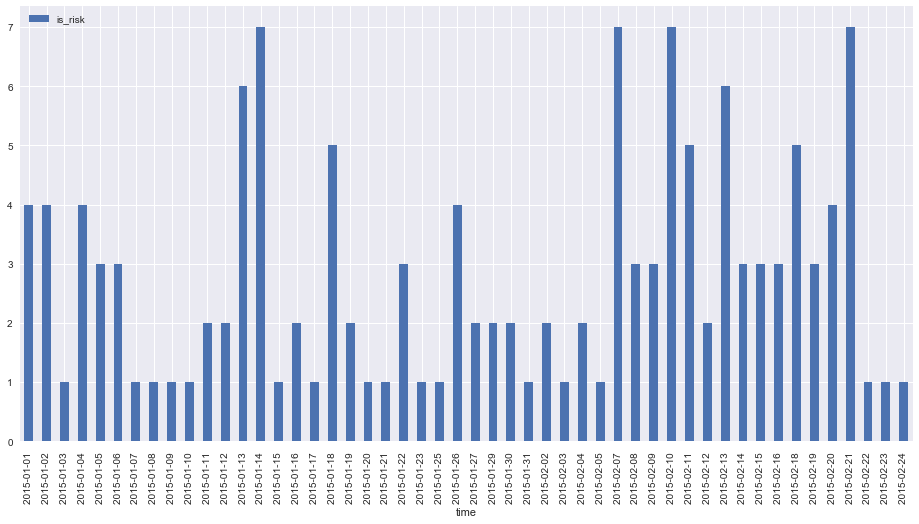

In [20]:
dt[:50].plot.bar( figsize=(16, 8))
plt.show()